![title](../nag_logo.png)

# Exercises - Optimization

## Univariate functions

We wish to minimize a simple function of one variable using a NAG optimizer

Interfaces to the NAG Library are provided in the `naginterfaces.library` subpackage

One can see from the HTML documentation [here](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.html) that the relevant algorithmic submodule for (local) optimization is `opt`.

Studying the `opt` Functionality Index confirms that a suitable optimization solver to call is `one_var_func`. The HTML documentation for this solver is [here](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.opt.one_var_func.html.)

Write a program to find the minimum of the function $x^2 + 3x - 5$ using `one_var_func`. Assume that the required minimum lies in the range $[-6.0,4.0]$.


In [1]:
from naginterfaces.library import opt

def f(x):
    return x ** 2 + 3*x - 5

tol = 1e-8
maxit = 1000
out = opt.one_var_func(f, tol, tol, -6.0, 4.0, maxit)
print(out)


OneVarFuncReturnData(e1=1e-08, e2=1e-08, a=-1.5, b=0.0, maxcal=6, x=-1.499999975, f=-7.25)


Extract the optimum identified by `one_var_func` and display it on the plot below.

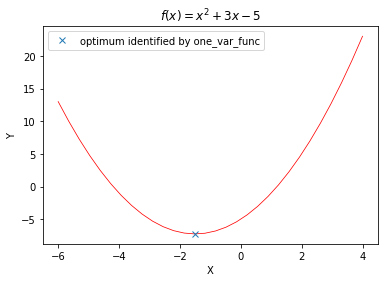

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-6.0, 4.0, 30)
y = f(x)
plt.plot(x, y, color='r', linewidth=0.75)

x_opt = out.x
fval_opt = out.f
plt.plot(x_opt, fval_opt, "x", label='optimum identified by one_var_func')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('$f(x) = x^2 + 3x - 5$')
plt.legend(loc='upper left')
plt.show()

## Multivariate functions - no user supplied derivatives

Consider the following function
$$ g(x,y)= \sin(3y-x^2+1) + \cos(2y^2-2x), $$
subject to the following constraints:
$$ -2 \leq x \leq 1, -1 \leq y \leq 1. $$
Make a contour plot of the function and constraints, and estimate the minimum. Using the decision tree in the [E04 chapter introduction](https://www.nag.com/numeric/fl/nagdoc_latest/html/e04/e04intro.html), find a suitable easy-to-use routine to solve this problem. How does the starting point vary the solution? Do you always get the correct one?

Note: in the NAG documentation constraints are classified into (i) simple bounds, (ii) linear constraints, (iii) nonlinear constraints.  Simple bounds are a special case of linear constraints, and linear constraints are a special case of nonlinear constraints.  However if the only constraints on a problem are simple bounds, then we say that the problem has no linear or nonlinear constraints.

In [3]:
import time

#define objective function
def g(x):
    return np.sin(3 * x[1] - x[0] ** 2 + 1) + np.cos( 2 * x[1] ** 2 - 2 * x[0])

# evaluate function on a grid
x = np.linspace(-2.0, 1.0, 30)
y = np.linspace(-1.0, 1.0, 30)
xx, yy = np.meshgrid(x,y, indexing='ij')
def gg(x,y):
    return g( [x,y] )
g_val = gg( x[None,:], y[:,None] )

# set up bounds
bl = [-2.0, -1.0]
bu = [1.0, 1.0]

# solve
x_init1 = [-1.0, -0.5]
start_time = time.time()

out = opt.bounds_quasi_func_easy(0, g, bl, bu, x_init1) # call solver

elapsed_time_func = (time.time() - start_time) * 1e3
x_opt_init1 = out.x
gval_opt_init1 = out.f
print(out)

BoundsQuasiFuncEasyReturnData(bl=array([-2., -1.]), bu=array([1., 1.]), x=array([-1.56951417, -0.0358072 ]), f=-2.0, iw=array([1, 2, 2, 2]), w=array([ 0.00000000e+000, -4.70114194e-009,  6.25037429e+000,
        7.78883445e-001,  4.17710202e-236,  4.49150482e+077,
       -1.56951417e+000, -3.58071805e-002, -1.56951414e+000,
       -3.58073978e-002, -1.08174744e-003,  6.82317440e-003,
       -4.10139109e-008,  5.37781959e-008,  0.00000000e+000,
       -4.70114194e-009, -4.78886522e-008,  8.46205550e-008,
        2.78201112e-008,  2.36160286e-008,  6.97738434e-001,
        1.37185451e+001,  2.19483577e+000,  0.00000000e+000,
       -4.70114194e-009]))


In [4]:
# solve with another i.c.
x_init2 = [0.9, 0.0]
(_,_,x_opt_init2,gval_opt_init2,_,_) = opt.bounds_quasi_func_easy(0, g, bl, bu, x_init2)

<ipython-input-4-c7e5dfd5aed0>:3: NagAlgorithmicWarning: (NAG Python function naginterfaces.base.opt.bounds_quasi_func_easy, code 5:5,1)
** It is probable that a local minimum has been found,
** but it cannot be guaranteed.
  (_,_,x_opt_init2,gval_opt_init2,_,_) = opt.bounds_quasi_func_easy(0, g, bl, bu, x_init2)


In [5]:
# solve with another i.c.
x_init3 = [-1.0, 0.9]
(_,_,x_opt_init3,gval_opt_init3,_,_) = opt.bounds_quasi_func_easy(0, g, bl, bu, x_init3)
out = opt.bounds_quasi_func_easy(0, g, bl, bu, x_init3)
print(out)

BoundsQuasiFuncEasyReturnData(bl=array([-2., -1.]), bu=array([1., 1.]), x=array([-0.40998172,  1.        ]), f=-1.5855074116537922, iw=array([ 1, -1,  1, -1]), w=array([ 4.38832894e-008,  0.00000000e+000,  1.00000000e+000,
        7.78883445e-001,  4.17710202e-236,  4.49150482e+077,
        1.00000000e+000,  1.00000000e+000, -1.58550741e+000,
       -1.05114491e+000, -1.00000000e+000,  0.00000000e+000,
       -4.53800922e-008, -1.11060065e-001,  4.38832894e-008,
       -1.05489913e+000, -2.63299736e-007, -1.05489913e+000,
        2.27695037e-008,  1.41162789e-008,  0.00000000e+000,
        5.80209788e+000,  0.00000000e+000,  4.38832894e-008,
       -3.57757284e+000]))


<ipython-input-5-0b49bb2877f0>:3: NagAlgorithmicWarning: (NAG Python function naginterfaces.base.opt.bounds_quasi_func_easy, code 5:5,1)
** It is probable that a local minimum has been found,
** but it cannot be guaranteed.
  (_,_,x_opt_init3,gval_opt_init3,_,_) = opt.bounds_quasi_func_easy(0, g, bl, bu, x_init3)
<ipython-input-5-0b49bb2877f0>:4: NagAlgorithmicWarning: (NAG Python function naginterfaces.base.opt.bounds_quasi_func_easy, code 5:5,1)
** It is probable that a local minimum has been found,
** but it cannot be guaranteed.
  out = opt.bounds_quasi_func_easy(0, g, bl, bu, x_init3)


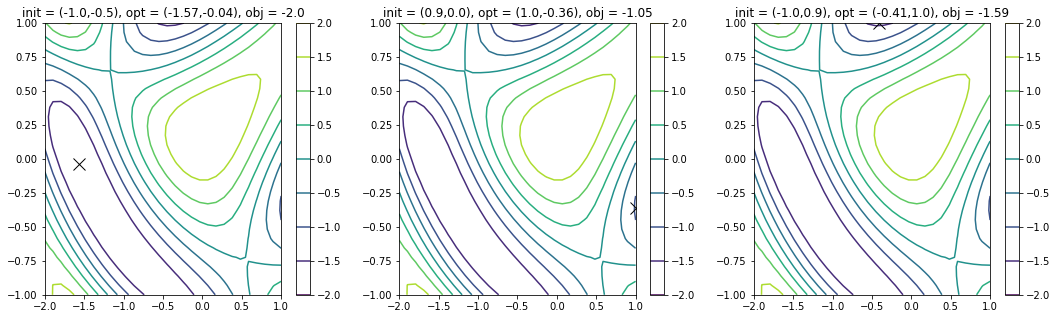

In [6]:
def f2str(x):
    return str(round(x,2))

def ff2str(x):
    return '(' + f2str(x[0]) + ',' + f2str(x[1]) + ')'

# plot first solution
plt.subplot(131)
plt.contour(x, y, g_val)
plt.colorbar()
plt.plot(x_opt_init1[0], x_opt_init1[1], "kx", linewidth=2, markersize=12)
plt.title('init = ' + ff2str(x_init1)  + ', opt = ' + ff2str(x_opt_init1) +', obj = ' + f2str(gval_opt_init1)  )
# plot second solution
plt.subplot(132)
plt.contour(x, y, g_val)
plt.colorbar()
plt.plot(x_opt_init2[0], x_opt_init2[1], "kx", linewidth=2, markersize=12)
plt.title('init = ' + ff2str(x_init2)  + ', opt = ' + ff2str(x_opt_init2) +', obj = ' + f2str(gval_opt_init2)    )

# plot third solution
plt.subplot(133)
plt.contour(x, y, g_val)
plt.colorbar()
plt.plot(x_opt_init3[0], x_opt_init3[1], "kx", linewidth=2, markersize=12)
plt.title('init = ' + ff2str(x_init3)  + ', opt = ' + ff2str(x_opt_init3) +', obj = ' + f2str(gval_opt_init3)    )

fig = plt.gcf()
fig.set_size_inches(18.0, 5.0)
plt.show()

### An alternative solution using a more generic optimization routine
In case you are interested in optimization routines with more sophisticated interfaces, e.g. general linear constraints and/or nonlinear constraints, here is another solution to the same problem using the `opt.nlp1_solve` routine.

In [7]:
def cb_objfun(mode, x, objgrd, _nstate):
    return g(x), objgrd

# Initialize the solver:
comm = opt.nlp1_init('nlp1_solve')
opt.nlp1_option_string('Print Level = 5' ,comm)  # print diagnostics
opt.nlp1_option_string('Derivative Level = 0' ,comm) # set flag for use of finite differences

bl = [-2.0, -1.0]
bu = [1.0, 1.0]

n = len(x_init1)
a = np.zeros((0,1))

start_time = time.time()

# call solver
out = opt.nlp1_solve(a, bl, bu, cb_objfun, x_init1, comm)

elapsed_time_nlp1 = (time.time() - start_time) * 1e3


x_opt = out.x
gx_opt = out.objf
print('opt = ', ff2str(x_opt))
print('obj = ', f2str(gx_opt))


naginterfaces.base.opt.nlp1_solve:
naginterfaces.base.opt.nlp1_solve:  *** e04uc
naginterfaces.base.opt.nlp1_solve:
naginterfaces.base.opt.nlp1_solve:  Parameters
naginterfaces.base.opt.nlp1_solve:  ----------
naginterfaces.base.opt.nlp1_solve:
naginterfaces.base.opt.nlp1_solve:  Linear constraints.....         0       Variables..............         2
naginterfaces.base.opt.nlp1_solve:  Nonlinear constraints..         0
naginterfaces.base.opt.nlp1_solve:
naginterfaces.base.opt.nlp1_solve:  Infinite bound size....  1.00E+20       COLD start.............
naginterfaces.base.opt.nlp1_solve:  Infinite step size.....  1.00E+20       EPS (machine precision)  1.11E-16
naginterfaces.base.opt.nlp1_solve:  Step limit.............  2.00E+00       Hessian................        NO
naginterfaces.base.opt.nlp1_solve:
naginterfaces.base.opt.nlp1_solve:  Linear feasibility.....  1.05E-08       Crash tolerance........  1.00E-02
naginterfaces.base.opt.nlp1_solve:  Nonlinear feasibility..  5.43E-06      

## Multivariate functions - user supplied gradient

The derivatives of f(x) are:
$$\begin{aligned}
\frac{\partial g}{\partial x} &= 2\big(\sin(2y^2-2x) - x \cos(3y-x^2+1)\big)\\
\frac{\partial g}{\partial y} &= 3 \cos(3y-x^2+1) - 4y(\sin(2y^2-2x))
\end{aligned}$$
Now solve the problem again using an appropriate routine. Is there a performance advantage? How does the time to solution vary with the starting point?
Pay attention to any error messages.

In [8]:
def g_deriv(x):
    gx = g(x)
    dgdx = np.zeros(2)
    dgdx[0] = 2 * ( np.sin(2 * x[1] ** 2 - 2 * x[0]) - x[0] * np.cos(3 * x[1] - x[0] ** 2 + 1 ) )
    dgdx[1] = 3 * np.cos(3 * x[1] - x[0] ** 2 + 1) - 4 * x[1] * np.sin( 2 * x[1] ** 2 - 2 * x[0])
    return gx, dgdx

# solve
start_time = time.time()

out = opt.bounds_quasi_deriv_easy(0, g_deriv, bl, bu, x_init1)  # call solver

elapsed_time_deriv = (time.time() - start_time) * 1e3
#print(out)
x_opt_init1 = out.x
gval_opt_init1 = out.f

print('Elapsed time for bounds_quasi_func_easy (ms) = ' + str(elapsed_time_func))
print('Elapsed time for bounds_quasi_deriv_easy (ms) = ' + str(elapsed_time_deriv))


Elapsed time for bounds_quasi_func_easy (ms) = 1.6739368438720703
Elapsed time for bounds_quasi_deriv_easy (ms) = 1.6205310821533203


In [9]:
# solve with another i.c.
(_,_,x_opt_init2,gval_opt_init2,_,_,_) = opt.bounds_quasi_deriv_easy(0, g_deriv, bl, bu, x_init2)

<ipython-input-9-e4d2eb429d51>:2: NagAlgorithmicWarning: (NAG Python function naginterfaces.base.opt.bounds_quasi_deriv_easy, code 5:5,99988)
** It is probable that a local minimum has been found,
** but it cannot be guaranteed.
  (_,_,x_opt_init2,gval_opt_init2,_,_,_) = opt.bounds_quasi_deriv_easy(0, g_deriv, bl, bu, x_init2)


In [10]:
# solve with another i.c.
(_,_,x_opt_init3,gval_opt_init3,_,_,_) = opt.bounds_quasi_deriv_easy(0, g_deriv, bl, bu, x_init3)

<ipython-input-10-0b0aa3505b4e>:2: NagAlgorithmicWarning: (NAG Python function naginterfaces.base.opt.bounds_quasi_deriv_easy, code 5:5,99988)
** It is probable that a local minimum has been found,
** but it cannot be guaranteed.
  (_,_,x_opt_init3,gval_opt_init3,_,_,_) = opt.bounds_quasi_deriv_easy(0, g_deriv, bl, bu, x_init3)


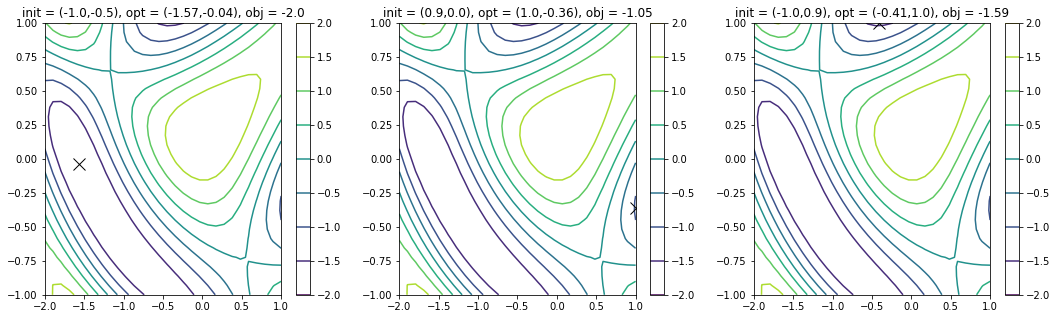

In [11]:
# plot first solution
plt.subplot(131)
plt.contour(x, y, g_val)
plt.colorbar()
plt.plot(x_opt_init1[0], x_opt_init1[1], "kx", linewidth=2, markersize=12)
plt.title('init = ' + ff2str(x_init1)  + ', opt = ' + ff2str(x_opt_init1) +', obj = ' + f2str(gval_opt_init1)  )
# plot second solution
plt.subplot(132)
plt.contour(x, y, g_val)
plt.colorbar()
plt.plot(x_opt_init2[0], x_opt_init2[1], "kx", linewidth=2, markersize=12)
plt.title('init = ' + ff2str(x_init2)  + ', opt = ' + ff2str(x_opt_init2) +', obj = ' + f2str(gval_opt_init2)    )

# plot third solution
plt.subplot(133)
plt.contour(x, y, g_val)
plt.colorbar()
plt.plot(x_opt_init3[0], x_opt_init3[1], "kx", linewidth=2, markersize=12)
plt.title('init = ' + ff2str(x_init3)  + ', opt = ' + ff2str(x_opt_init3) +', obj = ' + f2str(gval_opt_init3)    )

fig = plt.gcf()
fig.set_size_inches(18.0, 5.0)
plt.show()

## Global optimization

Using the guidance in the [E05 chapter introduction](https://www.nag.com/numeric/fl/nagdoc_latest/html/e05/e05intro.html) find a global optimization routine to identify the minimum of the objective function from the previous exercise.

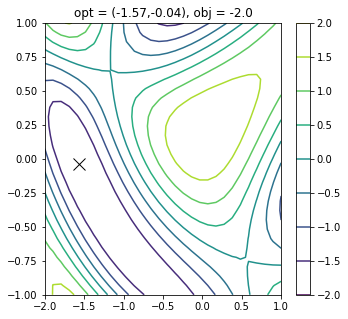

In [12]:
from naginterfaces.library import glopt
def g_mcs(x,_nstate):
    return g(x)

comm = glopt.bnd_mcs_init() # initialize solver
start_time = time.time()

out = glopt.bnd_mcs_solve(g_mcs, 0, bl, bu, comm) # call solver

elapsed_time_mcs = (time.time() - start_time) * 1e3
x_opt_mcs = out.x
gval_opt_mcs = out.obj

# plot first solution
plt.subplot(131)
plt.contour(x, y, g_val)
plt.colorbar()
plt.plot(x_opt_mcs[0], x_opt_mcs[1], "kx", linewidth=2, markersize=12)
plt.title('opt = ' + ff2str(x_opt_mcs) +', obj = ' + f2str(gval_opt_mcs)  )

fig = plt.gcf()
fig.set_size_inches(18.0, 5.0)

In [13]:
print('Elapsed time for opt.bounds_quasi_func_easy (ms) = ' + f2str(elapsed_time_func))
print('Elapsed time for opt.nlp1_solve (ms) = ' + f2str(elapsed_time_nlp1))
print('Elapsed time for opt.bounds_quasi_deriv_easy (ms) = ' + f2str(elapsed_time_deriv))
print('Elapsed time for glopt.bnd_mcs_solve (ms) = ' + f2str(elapsed_time_mcs))

Elapsed time for opt.bounds_quasi_func_easy (ms) = 1.67
Elapsed time for opt.nlp1_solve (ms) = 5.82
Elapsed time for opt.bounds_quasi_deriv_easy (ms) = 1.62
Elapsed time for glopt.bnd_mcs_solve (ms) = 4.34
